In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import time
import joblib

from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iot23_combined.csv")

In [ ]:
data.head()

,Unnamed: 0,ts,id.orig_h,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,1.540470e+09,192.168.1.132,0.003497,0,0,0.0,5.0,212.0,3.0,...,0,0,0,0,0,0,0,1,0,0
1,1,1.540470e+09,192.168.1.132,0.036724,34,311,0.0,1.0,62.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,2,1.540469e+09,192.168.1.132,384.518261,15072,0,0.0,48.0,16416.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,3,1.540470e+09,192.168.1.132,0.270332,48,48,0.0,1.0,76.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,4,1.540470e+09,192.168.1.132,0.111429,48,48,0.0,1.0,76.0,1.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data.columns

Index(['Unnamed: 0', 'ts', 'id.orig_h', 'duration', 'orig_bytes', 'resp_bytes',
       'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'label', 'proto_icmp', 'proto_tcp', 'proto_udp',
       'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
       'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
       'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3',
       'conn_state_SF', 'conn_state_SH', 'conn_state_SHR'],
      dtype='object')

## **Show the unique values of the type of attacks**

In [ ]:
data.label.unique()

array(['Benign', 'PartOfAHorizontalPortScan', 'Okiru', 'DDoS',
       'C&C-HeartBeat', '-   Benign   -', 'C&C-Torii', 'C&C', 'Attack',
       'C&C-FileDownload', 'FileDownload', 'C&C-HeartBeat-FileDownload',
       'C&C-Mirai'], dtype=object)

In [ ]:
data['label'].value_counts()

PartOfAHorizontalPortScan     825939
Okiru                         262690
-   Benign   -                146275
DDoS                          138777
Benign                         53481
C&C                            15100
Attack                          3915
C&C-HeartBeat                    349
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          1
Name: label, dtype: int64

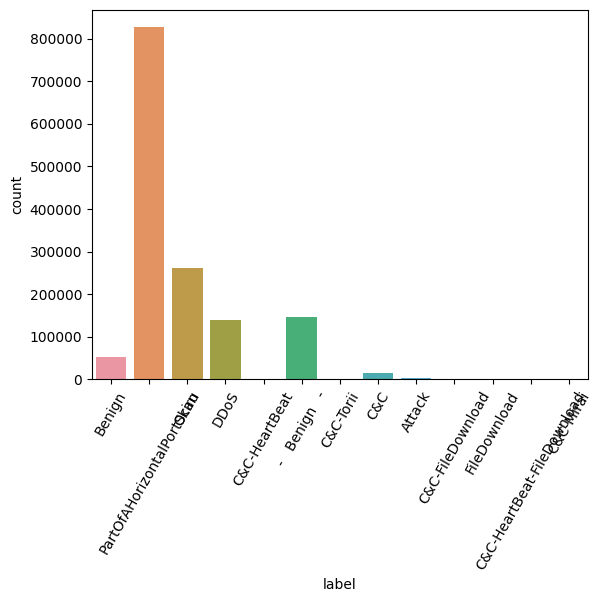

In [ ]:
sns.countplot(x='label', data=data)
plt.xticks(rotation=60)
plt.show()

## **Clean the data**

In [ ]:
data['label'].replace({'-   Benign   -': 'Benign', 'Benign ': 'Benign'}, inplace=True)

In [ ]:
data['label'].unique()

array(['Benign', 'PartOfAHorizontalPortScan', 'Okiru', 'DDoS',
       'C&C-HeartBeat', 'C&C-Torii', 'C&C', 'Attack', 'C&C-FileDownload',
       'FileDownload', 'C&C-HeartBeat-FileDownload', 'C&C-Mirai'],
      dtype=object)

## **Feature Engineering**

In [ ]:
data['label'].replace({'C&C-HeartBeat': 'C&C',
                       'C&C-Torii': 'C&C',
                        'C&C-FileDownload': 'C&C',
                        'C&C-HeartBeat-FileDownload':'C&C',
                        'C&C-Mirai': 'C&C'}, inplace=True)

In [ ]:
data.label.unique()

array(['Benign', 'PartOfAHorizontalPortScan', 'Okiru', 'DDoS', 'C&C',
       'Attack', 'FileDownload'], dtype=object)

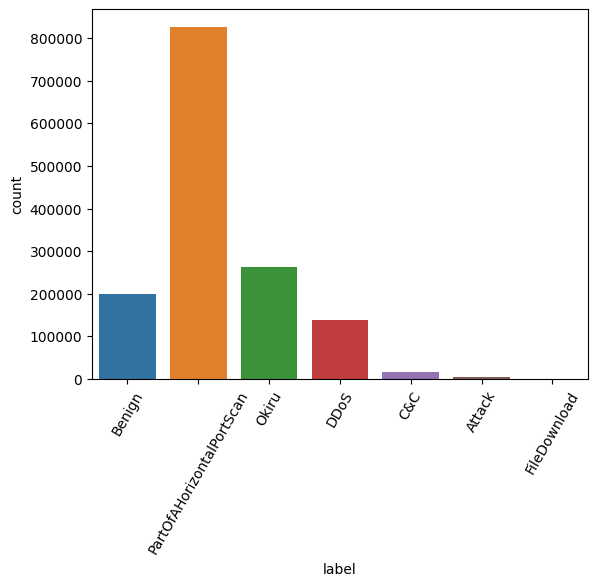

In [ ]:
sns.countplot(x='label', data=data)
plt.xticks(rotation=60)
plt.show()


In [ ]:
del data['Unnamed: 0']
del data['id.orig_h']
del data['ts']
data.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0.003497,0,0,0.0,5.0,212.0,3.0,144.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
1,0.036724,34,311,0.0,1.0,62.0,1.0,339.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
2,384.518261,15072,0,0.0,48.0,16416.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
3,0.270332,48,48,0.0,1.0,76.0,1.0,76.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
4,0.111429,48,48,0.0,1.0,76.0,1.0,76.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0


## **Check for duplication**

In [ ]:
# Step 1: Check for duplicated rows
duplicates = data.duplicated()

# Step 2: Count the occurrences of duplicates
duplicate_counts = duplicates.sum()
print("Number of duplicated rows:", duplicate_counts)

# Step 3: Remove duplicated rows
data = data.drop_duplicates()

# Step 4: Verify that duplicates have been removed
duplicates_after_removal = data.duplicated().sum()
print("Number of duplicated rows after removal:", duplicates_after_removal)

data

Number of duplicated rows: 1398487
Number of duplicated rows after removal: 0


,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0.003497,0,0,0.0,5.0,212.0,3.0,144.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
1,0.036724,34,311,0.0,1.0,62.0,1.0,339.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
2,384.518261,15072,0,0.0,48.0,16416.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
3,0.270332,48,48,0.0,1.0,76.0,1.0,76.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
4,0.111429,48,48,0.0,1.0,76.0,1.0,76.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446389,16.002137,212,0,0.0,2.0,268.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
1446391,32.008281,318,0,0.0,3.0,402.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
1446392,47.719591,385,0,0.0,4.0,497.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
1446395,32.008033,318,0,0.0,3.0,402.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
data.duration.unique()
data = data[(data['duration'] >= 0)]

#  Print the resulting dataset
data.duration.unique()

data.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv', index=False)

## **Building The Classification Models**

In [ ]:
filepath = "/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv"
SVM = pd.read_csv(filepath, nrows=27000)
SVM.shape

(27000, 25)

### **Support Vector machine (SVM) model**

In [ ]:
features = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']
target = 'label'

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the data
X = SVM[features]
Y = SVM[target]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the data (recommended for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the SVM classifier model and fit it to the training data
SVM_classifier = SVC(C=1.0, cache_size=1500, verbose=True)
SVM_classifier.fit(X_train, Y_train)

# Evaluate the model on the testing data
score = SVM_classifier.score(X_test, Y_test)
print('Model Accuracy: ', score)



[LibSVM]Model Accuracy:  0.825


In [ ]:
# Predict the labels of the test set
y_pred = SVM_classifier.predict(X_test)

# Suppress the UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn.metrics')

# Calculate the classification report of the model
report = classification_report(Y_test, y_pred, zero_division=0)
print('Classification Report:')
print(report)
print()

# Calculate the time taken by the model to run
start_time = time.time()
print()
end_time = time.time()
print('Time taken: ', end_time - start_time, 'seconds')

Classification Report:
                           precision    recall  f1-score   support

                   Attack       0.73      1.00      0.85       762
                   Benign       0.92      0.89      0.90      1511
                      C&C       0.99      0.38      0.55       726
                     DDoS       0.50      1.00      0.67         1
                    Okiru       0.00      0.00      0.00         3
PartOfAHorizontalPortScan       0.79      0.86      0.83      2397

                 accuracy                           0.82      5400
                macro avg       0.65      0.69      0.63      5400
             weighted avg       0.84      0.82      0.81      5400



Time taken:  0.00037217140197753906 seconds


### **Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import time
import warnings


DS = pd.read_csv(filepath, nrows=27000)
DS.shape

# Select features and target variable
features = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']
target = 'label'

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(DS[features], DS[target], random_state=5, test_size=0.2)

# Create an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create Decision Tree classifier
classifier = DecisionTreeClassifier()

start = time.time()
print('program start...')
print()

# Fit the model
classifier.fit(X_train, Y_train)
print()

# Evaluate the model
score = classifier.score(X_test, Y_test)
print('Model Accuracy: ',score)
print()
y_pred = classifier.predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

# Suppress the UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn.metrics')

print("Classification Report:")
print(classification_report(Y_test, y_pred))


program start...


Model Accuracy:  0.9374074074074074

['Benign' 'PartOfAHorizontalPortScan' 'Attack' ... 'Attack'
 'PartOfAHorizontalPortScan' 'PartOfAHorizontalPortScan']

program end...

time cost: 
0.08197021484375 seconds
Classification Report:
                           precision    recall  f1-score   support

                   Attack       1.00      0.99      1.00       777
                   Benign       0.88      0.90      0.89      1453
                      C&C       0.99      0.99      0.99       676
                     DDoS       0.50      0.50      0.50         2
                    Okiru       1.00      0.50      0.67         6
PartOfAHorizontalPortScan       0.94      0.93      0.93      2486

                 accuracy                           0.94      5400
                macro avg       0.88      0.80      0.83      5400
             weighted avg       0.94      0.94      0.94      5400



## **CNN Model**

In [ ]:
CNN = pd.read_csv(filepath)

X = CNN[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']].values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
CNN['label'] = le.fit_transform(CNN['label'])

CNN['label']

CNN['label'].unique()

#define the features and target
features = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']
target = 'label'

#load the data
X = CNN[features]
Y = CNN[target]

Y = pd.get_dummies(CNN['label']).values
X.shape

scaler = MinMaxScaler()
scaler.fit(X)
normalized_x = scaler.transform(X)
normalized_x
normalized_x.shape
scaler.fit(Y)
normalized_y = scaler.transform(Y)
normalized_y


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

### **Conficure the archetucture of the CNN Model**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_x, normalized_y, random_state=10, test_size=0.2)
model = Sequential()
from tensorflow.keras.utils import to_categorical

# Define the features and target
features = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
            'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ',
            'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0',
            'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']
target = 'label'


# Encode the target variable
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

# Split the data into train and test sets
X = data[features]
Y = data[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the target variable to categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# Configure the architecture of the CNN model
model = Sequential()
model.add(Dense(2000, activation='relu', input_dim=len(features)))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(le.classes_), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
start = time.time()
print('Program start...')
print()

history = model.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data=(X_test, Y_test), verbose=1)
print()

end = time.time()
print('Program end...')
print()
print('Time cost: ')
print(end - start, 'seconds')

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy:', test_accuracy)

<ipython-input-53-ffb94f86a1c0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = le.fit_transform(data['label'])


Program start...

Epoch 1/10
151/151 [==============================] - 37s 234ms/step - loss: 0.8682 - accuracy: 0.6052 - val_loss: 0.8188 - val_accuracy: 0.6286
Epoch 2/10
151/151 [==============================] - 33s 217ms/step - loss: 0.8170 - accuracy: 0.6241 - val_loss: 0.8082 - val_accuracy: 0.6288
Epoch 3/10
151/151 [==============================] - 36s 239ms/step - loss: 0.8147 - accuracy: 0.6264 - val_loss: 0.8044 - val_accuracy: 0.6302
Epoch 4/10
151/151 [==============================] - 32s 215ms/step - loss: 0.8100 - accuracy: 0.6270 - val_loss: 0.8043 - val_accuracy: 0.6307
Epoch 5/10
151/151 [==============================] - 33s 221ms/step - loss: 0.8076 - accuracy: 0.6267 - val_loss: 0.8025 - val_accuracy: 0.6309
Epoch 6/10
151/151 [==============================] - 36s 237ms/step - loss: 0.8069 - accuracy: 0.6272 - val_loss: 0.8020 - val_accuracy: 0.6307
Epoch 7/10
151/151 [==============================] - 41s 274ms/step - loss: 0.8043 - accuracy: 0.6278 - val_los